# Assignment 6: Dimensionality Reduction & Visualization

This assignment will give you a chance to practice using some of the unsupervised learning methods implemented in scikit-learn, as well as give you a chance to play around with some of the visualization tools provided by matplotlib.  Keep in mind that there are other libraries out there for visualization (and for machine learning in general); this is not the full extent of what is possible, just an introduction.

*Note that this assignment includes a bunch of worked examples, intermixed with the actual homework problems.  Look for **"todo"** to find places you need to provide code or answers.*

In [1]:
# CSC 4510 - Machine Learning
# Assignment 6
# Scaffolding by Dr. Ben Mitchell
# Assignment completed by: <YOUR NAME(S) HERE>
# Resources used: 
#   <List any resources you used beyond the ones posted on Blackboard>
#   <This can include books, websites, other students, etc.>

In [1]:
import numpy as np

# import sklearn stuff
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# set up for plotting figures in the notebook
%matplotlib inline
# NOTE: you can also try 'notebook' or 'widget' in place of 'inline' (may require installing extra packages, but more functionality)
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn import neighbors # import nearest neighbor classifiers
from sklearn import svm # import SVM classifiers
from sklearn import tree # import decision tree classifiers
from sklearn.model_selection import train_test_split # import holdout validation split method
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.ensemble import VotingClassifier

## Load some data
This time, we're going to load a couple of data sets to play with.  First, we'll load our old friend the Iris dataset, but then we'll load another dataset that's a bit higher dimensional, and allows other kinds of visualizations.  

In [4]:
# load the iris dataset
iris = datasets.load_iris()

In [5]:
# note that the iris data is 4-dimensional
iris.data.shape

(150, 4)

In [6]:
# let's look at the first 10 elements
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Plot the data
Since the iris dataset has 4 features, we'll need to plot them as pairs; we can use color to represent class label.  Here is an example of plotting the first two dimensions:

Text(0.5, 1.0, 'Iris dataset (first two dimensions)')

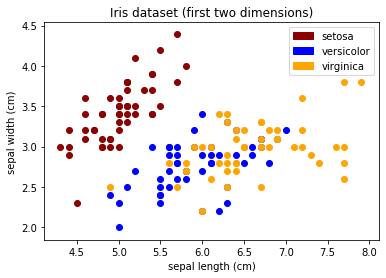

In [8]:
plt.figure() # make a new figure to plot in
# let's set up a list of colors for the different class labels:
colors = ['darkred', 'blue', 'orange']
# now we'll loop over the points in our data set, and plot them one at a time
for i in range(len(iris.data)):
    # use the first 2 dimensions as our x and y coordinates
    x = iris.data[i][0]
    y = iris.data[i][1]
    # use the target (which we know is 0, 1, or 2) to select the color for this point
    c = colors[iris.target[i]]
    # plot the point as a single point in a scatter graph
    plt.scatter(x, y, color=c)

# now let's add some axis labels; we'll use the names from the data set
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
# if we want a key, we'll need to make "handles" attaching colors to names
red = mpatches.Patch(color='darkred', label='setosa')
blue = mpatches.Patch(color='blue', label='versicolor')
orange = mpatches.Patch(color='orange', label='virginica')
# now actually show the legend
plt.legend(handles=[red, blue, orange])

# let's add a title
plt.title('Iris dataset (first two dimensions)')

# Plot the other combinations of axes
You will need a total of 6 plots (including the one above) to plot all possible combinations of dimensions; the remaining 5 are left to you, but you should be able to copy the example above and make minor modifications to it.

Text(0.5, 1.0, 'Iris dataset (First and Third dimensions)')

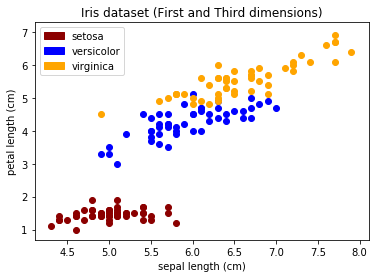

In [9]:
plt.figure() # make a new figure to plot in
# let's set up a list of colors for the different class labels:
colors = ['darkred', 'blue', 'orange']
# now we'll loop over the points in our data set, and plot them one at a time
for i in range(len(iris.data)):
    # use the first 2 dimensions as our x and y coordinates
    x = iris.data[i][0]
    y = iris.data[i][2]
    # use the target (which we know is 0, 1, or 2) to select the color for this point
    c = colors[iris.target[i]]
    # plot the point as a single point in a scatter graph
    plt.scatter(x, y, color=c)

# now let's add some axis labels; we'll use the names from the data set
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
# if we want a key, we'll need to make "handles" attaching colors to names
red = mpatches.Patch(color='darkred', label='setosa')
blue = mpatches.Patch(color='blue', label='versicolor')
orange = mpatches.Patch(color='orange', label='virginica')
# now actually show the legend
plt.legend(handles=[red, blue, orange])

# let's add a title
plt.title('Iris dataset (First and Third dimensions)')

Text(0.5, 1.0, 'Iris dataset (First and Fourth dimensions)')

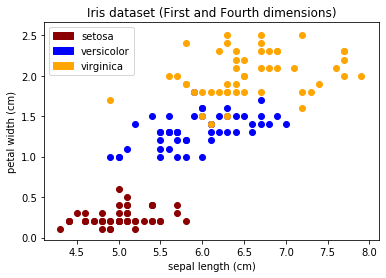

In [10]:
plt.figure() # make a new figure to plot in
# let's set up a list of colors for the different class labels:
colors = ['darkred', 'blue', 'orange']
# now we'll loop over the points in our data set, and plot them one at a time
for i in range(len(iris.data)):
    # use the first 2 dimensions as our x and y coordinates
    x = iris.data[i][0]
    y = iris.data[i][3]
    # use the target (which we know is 0, 1, or 2) to select the color for this point
    c = colors[iris.target[i]]
    # plot the point as a single point in a scatter graph
    plt.scatter(x, y, color=c)

# now let's add some axis labels; we'll use the names from the data set
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])
# if we want a key, we'll need to make "handles" attaching colors to names
red = mpatches.Patch(color='darkred', label='setosa')
blue = mpatches.Patch(color='blue', label='versicolor')
orange = mpatches.Patch(color='orange', label='virginica')
# now actually show the legend
plt.legend(handles=[red, blue, orange])

# let's add a title
plt.title('Iris dataset (First and Fourth dimensions)')

Text(0.5, 1.0, 'Iris dataset (Second and Third dimensions)')

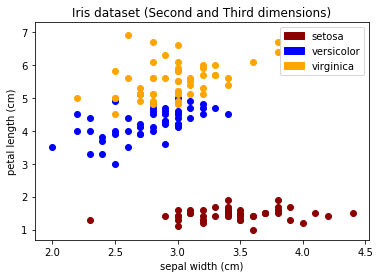

In [11]:
plt.figure() # make a new figure to plot in
# let's set up a list of colors for the different class labels:
colors = ['darkred', 'blue', 'orange']
# now we'll loop over the points in our data set, and plot them one at a time
for i in range(len(iris.data)):
    # use the first 2 dimensions as our x and y coordinates
    x = iris.data[i][1]
    y = iris.data[i][2]
    # use the target (which we know is 0, 1, or 2) to select the color for this point
    c = colors[iris.target[i]]
    # plot the point as a single point in a scatter graph
    plt.scatter(x, y, color=c)

# now let's add some axis labels; we'll use the names from the data set
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
# if we want a key, we'll need to make "handles" attaching colors to names
red = mpatches.Patch(color='darkred', label='setosa')
blue = mpatches.Patch(color='blue', label='versicolor')
orange = mpatches.Patch(color='orange', label='virginica')
# now actually show the legend
plt.legend(handles=[red, blue, orange])

# let's add a title
plt.title('Iris dataset (Second and Third dimensions)')

Text(0.5, 1.0, 'Iris dataset (Second and Fourth dimensions)')

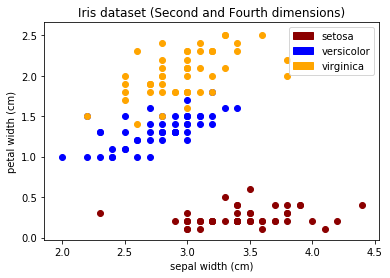

In [12]:
plt.figure() # make a new figure to plot in
# let's set up a list of colors for the different class labels:
colors = ['darkred', 'blue', 'orange']
# now we'll loop over the points in our data set, and plot them one at a time
for i in range(len(iris.data)):
    # use the first 2 dimensions as our x and y coordinates
    x = iris.data[i][1]
    y = iris.data[i][3]
    # use the target (which we know is 0, 1, or 2) to select the color for this point
    c = colors[iris.target[i]]
    # plot the point as a single point in a scatter graph
    plt.scatter(x, y, color=c)

# now let's add some axis labels; we'll use the names from the data set
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[3])
# if we want a key, we'll need to make "handles" attaching colors to names
red = mpatches.Patch(color='darkred', label='setosa')
blue = mpatches.Patch(color='blue', label='versicolor')
orange = mpatches.Patch(color='orange', label='virginica')
# now actually show the legend
plt.legend(handles=[red, blue, orange])

# let's add a title
plt.title('Iris dataset (Second and Fourth dimensions)')

Text(0.5, 1.0, 'Iris dataset (Third and Fourth dimensions)')

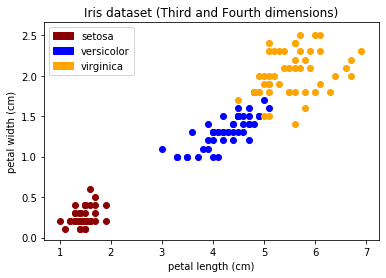

In [13]:
plt.figure() # make a new figure to plot in
# let's set up a list of colors for the different class labels:
colors = ['darkred', 'blue', 'orange']
# now we'll loop over the points in our data set, and plot them one at a time
for i in range(len(iris.data)):
    # use the first 2 dimensions as our x and y coordinates
    x = iris.data[i][2]
    y = iris.data[i][3]
    # use the target (which we know is 0, 1, or 2) to select the color for this point
    c = colors[iris.target[i]]
    # plot the point as a single point in a scatter graph
    plt.scatter(x, y, color=c)

# now let's add some axis labels; we'll use the names from the data set
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
# if we want a key, we'll need to make "handles" attaching colors to names
red = mpatches.Patch(color='darkred', label='setosa')
blue = mpatches.Patch(color='blue', label='versicolor')
orange = mpatches.Patch(color='orange', label='virginica')
# now actually show the legend
plt.legend(handles=[red, blue, orange])

# let's add a title
plt.title('Iris dataset (Third and Fourth dimensions)')

# Which one seems the most useful?
Which of these plots seems the best, and why? Write your answer (using Markdown) below:

***

The plot with the second and fourth dimension seems the best because it seems as if we have 3 distinct groups with the three different flowers. We are tracking the three groups with a common measurement in the width. Their are also only three overlapping points between versicolor and virgincia which is the lowest amount of overlap amongst all the plots.

## Run PCA
Here, we'll apply principal component analysis (PCA) to the dataset.  We'll use `n_components=2` to indicate we want to reduce our dimensionality to 2

In [14]:
# set up a PCA learner
pca = PCA(n_components = 2)
# actually run the fit algorithm
eigenbasis = pca.fit(iris.data)
# transform our data using the learned transform
iris2d = eigenbasis.transform(iris.data)

In [15]:
# note that our transformed dat is now 2-dimensional
iris2d.shape

(150, 2)

In [16]:
# again, let's look at the first 10 elements; note that they are 2 dimensional, rather than 4
iris2d[:10]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

### Examining components
We can look at the actual "principal components," which we're using as the basis for our transformed data space.  Since each component is a vector in the original data space, we can see what "axis" in the original space is the one of primary variance.

Since we said to use the top 2 components, we're going to have two vectors, each of length 4 (since our original data was 4 dimensional).

We can also show the amount of the total variance explained by each component, which tells us how "important" they are.

In [17]:
# the actual components
print("principal components:\n", pca.components_)
# let's also look at how much of the total variance we were able to cover with 2 dimensions
print('percentage of variance explained by first 2 principal components:', pca.explained_variance_ratio_)

principal components:
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
percentage of variance explained by first 2 principal components: [0.92461872 0.05306648]


## Make a plot of the 2D "transformed" data
 First, here's an example adapted from http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

Text(0.5, 1.0, 'PCA of IRIS dataset')

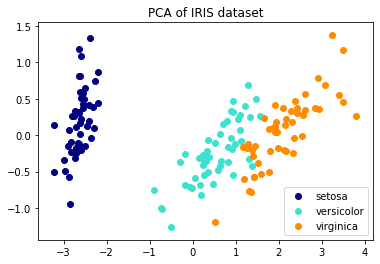

In [18]:
# make a new figure
plt.figure()
# pick some colors to use
colors = ['navy', 'turquoise', 'darkorange']

# plot our points with colors and labels
for color, i, iris.target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(iris2d[iris.target == i, 0], iris2d[iris.target == i, 1], color=color, label=iris.target_name)
plt.legend(loc='best')
plt.title('PCA of IRIS dataset')

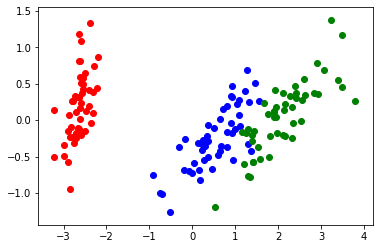

In [19]:
# here's an alternative version of plotting this data that may be easier to understand:
colors = ['red', 'blue', 'green']
plt.figure()
# loop over examples, and plot each one
for i in range(len(iris2d)):
    point = iris2d[i]
    classLabel = iris.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel])

# Compare this to the 6 plots from before
Does this plot seem "better" than the plots we made before using the original axes?  Explain the *pros* and *cons* of the two ways of visualizing the data (note that you should have at minimum one of each):

***

We get the same three distinct groups as with the other plots and little overlap. It is hard to tell if we gained more information from this plot compared to the others. It seems maybe a little "better", but there really isn't an information gain.

## SciKit Learn has several other methods of generating embeddings

We discussed several of these in class; see https://scikit-learn.org/stable/modules/manifold.html for the SciKit Learn users guide on the subject.  Here, we're going to use t-SNE and see how it compares to PCA.

Note that t-SNE is stochastic, so re-running this cell will result in a different plot each time.

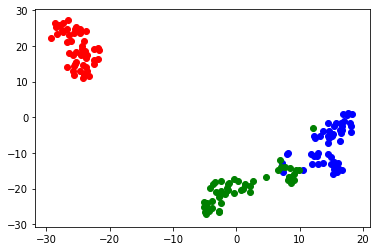

In [33]:
from sklearn import manifold

irisTSNE = manifold.TSNE(n_components = 2, perplexity = 15).fit_transform(iris.data)

colors = ['red', 'blue', 'green']
plt.figure()
# loop over examples, and plot each one
for i in range(len(iris2d)):
    point = irisTSNE[i]
    classLabel = iris.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel])

# Now let's try a different dataset
Here, we'll work with a set of small "pictures" of handwritten numeric digits.  Note that this is a miniature version; most real-world image datasets are much bigger (both in dimensionality and number of examples), but the same principles will apply.

In [2]:
# load a dataset composed of small images of written numbers
digits = datasets.load_digits()

In [3]:
# let's take a look at the shape of the dataset
digits.data.shape

(1797, 64)

Note that each example has 64 features, which in this case represent values from a 8x8 pixel grayscale image

In [4]:
# let's look at a random example; note that it's just a single vector with 64 elements
print('label is :', digits.target[20])
digits.data[20]

label is : 0


array([ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.,  0.,  0., 11., 16., 16.,
       16.,  2.,  0.,  0.,  4., 16.,  9.,  1., 14.,  2.,  0.,  0.,  4.,
       16.,  0.,  0., 16.,  2.,  0.,  0.,  0., 16.,  1.,  0., 12.,  8.,
        0.,  0.,  0., 15.,  9.,  0., 13.,  6.,  0.,  0.,  0.,  9., 14.,
        9., 14.,  1.,  0.,  0.,  0.,  2., 12., 13.,  4.,  0.,  0.])

In [6]:
# note that we can 'reshape' this data to get an 8x8 2D array (i.e. matrix) with those values
mat = np.reshape(digits.data[20], [8,8])
mat

array([[ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.],
       [ 0.,  0., 11., 16., 16., 16.,  2.,  0.],
       [ 0.,  4., 16.,  9.,  1., 14.,  2.,  0.],
       [ 0.,  4., 16.,  0.,  0., 16.,  2.,  0.],
       [ 0.,  0., 16.,  1.,  0., 12.,  8.,  0.],
       [ 0.,  0., 15.,  9.,  0., 13.,  6.,  0.],
       [ 0.,  0.,  9., 14.,  9., 14.,  1.,  0.],
       [ 0.,  0.,  2., 12., 13.,  4.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

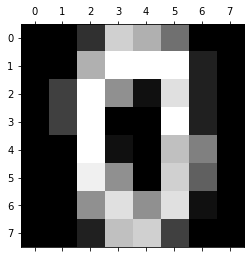

In [6]:
# we can also ask matplotlib to treat these examples as images (which they are), and plot one:
plt.gray() # use gray levels rather than colors
plt.matshow(mat) # show a matrix (i.e. 2D array) as visual values

# Visualize this data
Note that we can't realistically visualize all pairs of axes, there's way too many (though we can look at example images as shown above).  However, we can still do PCA and do a scatterplot of the first two dimensions, which is what you should do next.  Note that there are now going to be 10 different classes (the digits 0 through 9), so you'll need to pick some more colors to give each class its own color.  Try to ensure that the colors are visually distinct; here's a link to some colored patches along with their CSS names (which pyplot will recognise) http://www.crockford.com/wrrrld/color.html

In [7]:
# TODO: run PCA on the digit data and project the dataset down to 2 dimensions
# set up a PCA learner
pca = PCA(n_components = 2)
# actually run the fit algorithm
eigenbasis = pca.fit(digits.data)
# transform our data using the learned transform
digits2d = eigenbasis.transform(digits.data)

In [8]:
# the actual components
print("principal components:\n", pca.components_)
# let's also look at how much of the total variance we were able to cover with 2 dimensions
print('percentage of variance explained by first 2 principal components:', pca.explained_variance_ratio_)

principal components:
 [[-3.40315420e-18 -1.73094660e-02 -2.23428839e-01 -1.35913305e-01
  -3.30323077e-02 -9.66340806e-02 -8.32943722e-03  2.26900060e-03
  -3.20516514e-04 -1.19308908e-01 -2.44451676e-01  1.48512743e-01
  -4.67319522e-02 -2.17740745e-01 -1.48136783e-02  4.47779465e-03
  -4.94136548e-05 -7.95419405e-02  8.33951515e-02  2.15915345e-01
  -1.72126797e-01 -1.63712101e-01  2.86444397e-02  4.23251753e-03
   9.85488532e-05  6.42319142e-02  2.54093315e-01 -3.56771035e-02
  -2.09462557e-01 -4.31311485e-02  5.13118602e-02  2.13422713e-04
   0.00000000e+00  1.59950886e-01  3.68690765e-01  1.64406812e-01
   8.52007934e-02  3.72982900e-02  2.15866976e-02  0.00000000e+00
   1.28865593e-03  1.06945294e-01  3.03067465e-01  2.47813041e-01
   2.09637298e-01  1.22325239e-02 -3.69458482e-02  1.61485027e-03
   6.93023594e-04 -8.35143984e-03 -5.58598918e-02  9.30534155e-02
   1.07387716e-01 -1.37734575e-01 -6.32879487e-02  9.61670452e-04
   9.55079649e-06 -1.40786846e-02 -2.35675491e-01 -1.

In [ ]:
digits2d[:10]

In [ ]:
digits2d.shape

Text(0.5, 1.0, 'PCA of Digits dataset')

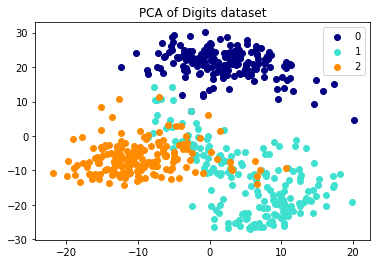

In [29]:
# TODO: make a scatterplot of the 2D version, using different colors for each class
# make a new figure
plt.figure()
# pick some colors to use
colors = ['navy', 'turquoise', 'darkorange']

# plot our points with colors and labels
for color, i, digits.target_name in zip(colors, [0, 1, 2], digits.target_names):
    plt.scatter(digits2d[digits.target == i, 0], digits2d[digits.target == i, 1], color=color, label=digits.target_name)
plt.legend(loc='best')
plt.title('PCA of Digits dataset')

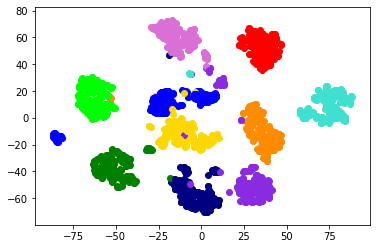

In [37]:
# TODO: run TSNE on the data to get a (different) 2-dimensional version, and make a plot for this version
digitsTSNE = manifold.TSNE(n_components = 2, perplexity = 15).fit_transform(digits.data)

colors = ['red', 'blue', 'green', 'navy', 'turquoise', 'darkorange','lime','orchid','gold','blueviolet']
plt.figure()
# loop over examples, and plot each one
for i in range(len(digits2d)):
    point = digitsTSNE[i]
    classLabel = digits.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel])

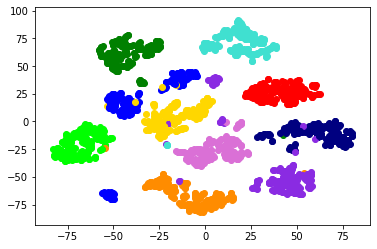

In [38]:
# TODO: run TSNE on the data to get a (different) 2-dimensional version, and make a plot for this version
digitsTSNE = manifold.TSNE(n_components = 2, perplexity = 10).fit_transform(digits.data)

colors = ['red', 'blue', 'green', 'navy', 'turquoise', 'darkorange','lime','orchid','gold','blueviolet']
plt.figure()
# loop over examples, and plot each one
for i in range(len(digits2d)):
    point = digitsTSNE[i]
    classLabel = digits.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel])

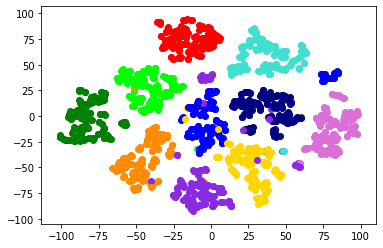

In [39]:
# TODO: run TSNE on the data to get a (different) 2-dimensional version, and make a plot for this version
digitsTSNE = manifold.TSNE(n_components = 2, perplexity = 5).fit_transform(digits.data)

colors = ['red', 'blue', 'green', 'navy', 'turquoise', 'darkorange','lime','orchid','gold','blueviolet']
plt.figure()
# loop over examples, and plot each one
for i in range(len(digits2d)):
    point = digitsTSNE[i]
    classLabel = digits.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel])

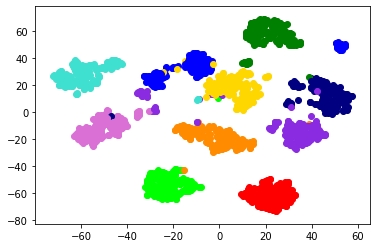

In [40]:
# TODO: run TSNE on the data to get a (different) 2-dimensional version, and make a plot for this version
digitsTSNE = manifold.TSNE(n_components = 2, perplexity = 20).fit_transform(digits.data)

colors = ['red', 'blue', 'green', 'navy', 'turquoise', 'darkorange','lime','orchid','gold','blueviolet']
plt.figure()
# loop over examples, and plot each one
for i in range(len(digits2d)):
    point = digitsTSNE[i]
    classLabel = digits.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel])

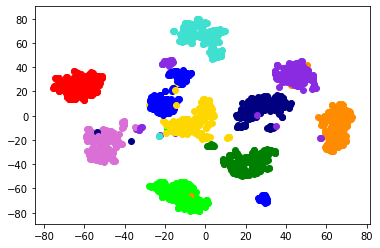

In [41]:
# TODO: run TSNE on the data to get a (different) 2-dimensional version, and make a plot for this version
digitsTSNE = manifold.TSNE(n_components = 2, perplexity = 17).fit_transform(digits.data)

colors = ['red', 'blue', 'green', 'navy', 'turquoise', 'darkorange','lime','orchid','gold','blueviolet']
plt.figure()
# loop over examples, and plot each one
for i in range(len(digits2d)):
    point = digitsTSNE[i]
    classLabel = digits.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel])

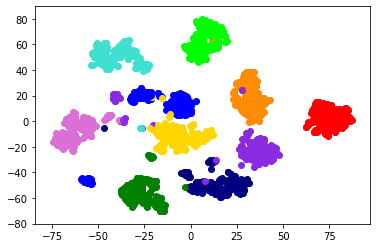

In [42]:
# TODO: run TSNE on the data to get a (different) 2-dimensional version, and make a plot for this version
digitsTSNE = manifold.TSNE(n_components = 2, perplexity = 16).fit_transform(digits.data)

colors = ['red', 'blue', 'green', 'navy', 'turquoise', 'darkorange','lime','orchid','gold','blueviolet']
plt.figure()
# loop over examples, and plot each one
for i in range(len(digits2d)):
    point = digitsTSNE[i]
    classLabel = digits.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel])

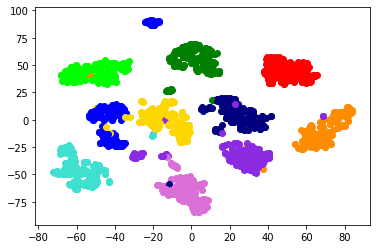

In [43]:
# TODO: run TSNE on the data to get a (different) 2-dimensional version, and make a plot for this version
digitsTSNE = manifold.TSNE(n_components = 2, perplexity = 13).fit_transform(digits.data)

colors = ['red', 'blue', 'green', 'navy', 'turquoise', 'darkorange','lime','orchid','gold','blueviolet']
plt.figure()
# loop over examples, and plot each one
for i in range(len(digits2d)):
    point = digitsTSNE[i]
    classLabel = digits.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel])

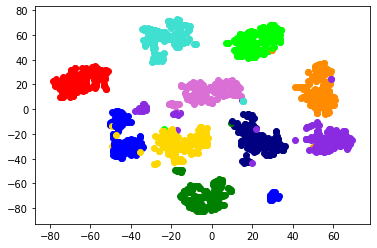

In [44]:
# TODO: run TSNE on the data to get a (different) 2-dimensional version, and make a plot for this version
digitsTSNE = manifold.TSNE(n_components = 2, perplexity = 15).fit_transform(digits.data)

colors = ['red', 'blue', 'green', 'navy', 'turquoise', 'darkorange','lime','orchid','gold','blueviolet']
plt.figure()
# loop over examples, and plot each one
for i in range(len(digits2d)):
    point = digitsTSNE[i]
    classLabel = digits.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel])

## What do you see?
Examine the plots you've made, and desribe what information about the nature of the data you can glean from the plots.  Note that you may want to play around with the parameters of t-sne and/or re-run it a few times to get a plot you like (in particular, see what different values of the 'perplexity' parameter do).

*** 

Of then many perplexities that we tried, 15 seems to give the most distinct picture with the 10 different blobs. It should be noted that every blob besides the lime and red ones have an overlap. The overlap between blobs is very slight though. Should also be noted that so blobs like the blue and violet ones have parts of their blob almost on the other side of the graph from where the main blob of their respective color. This sort of behaviour can be seen in all the plots of different perplexity, but it seems the most well-defined when we set the perplexity to 15.

## Visualizing components
Another thing we can do with PCA is to look at the principle components themselves.  Since each component is a vector in the original data space, we can view them the same way we did the original vectors; in this case, as images.

Try pulling out each of the top two components separately, and visualizing each of them as an image.  _HINT_: you should be able to do this by adapting code from earlier, when we showed first how to access the components, and later how to transform a 1D array to a 2D array and visualize it as an image.

In [ ]:
# TODO: reshape the first component and plot it as an image
mat = np.reshape(pca.components_[0], [8,8])
mat

<Figure size 432x288 with 0 Axes>

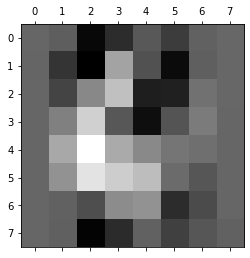

In [52]:
plt.gray() # use gray levels rather than colors
plt.matshow(mat) # show a matrix (i.e. 2D array) as visual values

<Figure size 432x288 with 0 Axes>

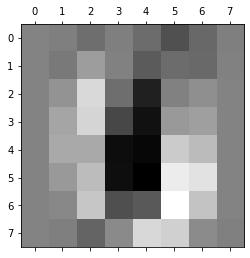

In [53]:
# TODO: reshape the second component and plot it as an image
mat = np.reshape(pca.components_[1], [8,8])
plt.gray() # use gray levels rather than colors
plt.matshow(mat) # show a matrix (i.e. 2D array) as visual values

# Applying ML techniques

Finally, you should try running a few classifiers on the digits data at different numbers of dimensions.  Try on the raw data, then try using PCA to reduce to varying numbers of features (perhaps try powers of 2 up to 32) and see how that impacts the performance of different classifiers.
(Note that as usual this will be data dependent, so don't expect the same trends to be present for all data sets.)

In [8]:
components = [2, 4, 16, 32, 64]

## Let's Try Different SVM models first

Support Vector Machine seems like a good fit for this dataset as we have very large vectors to work with and this style categorizes using a hyper plane.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)

linearSvm = svm.SVC(kernel='linear')
linearSvm.fit(X_train, y_train)
linearSvm.score(X_test, y_test)

0.9749652294853964

In [17]:
polySvm = svm.SVC(kernel='poly', gamma = 'auto')
polySvm.fit(X_train, y_train)
polySvm.score(X_test, y_test)

0.9902642559109874

In [18]:
rbfSvm = svm.SVC(kernel='rbf', gamma = 'auto')
rbfSvm.fit(X_train, y_train)
rbfSvm.score(X_test, y_test)

0.35465924895688455

#### Explanation

The poly support vector machine already returns 99% accuracy on the dataset. To save computation time, it may not be best to run principal components with this classifier.

### PCA version with SVM

In [19]:
for component in components:
  pca = PCA(n_components = component)
  eigenbasis = pca.fit(digits.data)
  digits2d = eigenbasis.transform(digits.data)
  X_train, X_test, y_train, y_test = train_test_split(digits2d, digits.target, test_size=0.4, random_state=0)
  linearSvm = svm.SVC(kernel='linear')
  linearSvm.fit(X_train, y_train)
  print("Components: ", component, "Score: ", linearSvm.score(X_test, y_test))

Components:  2 Score:  0.5952712100139083
Components:  4 Score:  0.7969401947148818
Components:  16 Score:  0.9596662030598053
Components:  32 Score:  0.9749652294853964
Components:  64 Score:  0.9749652294853964


**SVM poly takes awhile to run with PCAs, takes about 15 - 20min to run**

In [39]:
for component in components:
  pca = PCA(n_components = component)
  eigenbasis = pca.fit(digits.data)
  digits2d = eigenbasis.transform(digits.data)
  X_train, X_test, y_train, y_test = train_test_split(digits2d, digits.target, test_size=0.4, random_state=0)
  linearSvm = svm.SVC(kernel='poly', gamma = 'auto')
  linearSvm.fit(X_train, y_train)
  print("Components: ", component, "Score: ", linearSvm.score(X_test, y_test))

Components:  2 Score:  0.6133518776077886
Components:  4 Score:  0.8164116828929068
Components:  16 Score:  0.9902642559109874
Components:  32 Score:  0.9930458970792768
Components:  64 Score:  0.9916550764951322


#### Explanation

With 32 components, the accuracy is the best. The difference though between 16, 32, and 64 is very marginal. Only using 16 components with this classifier is good enough for the poly method and 32 is best for the linear method. Using pca with SVM may not be practical however, as the runtime is kinda long. Creating the PCA and then running the classifier may be computationally expensive to only gain .3%

## Let's Try Different Nearest Neighbor Models Next

In [20]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)

print("training shape:", X_train.shape, ", testing shape:", X_test.shape)

# now we can re-train our classifier using just the "training" part of the data:
classifierB = neighbors.KNeighborsClassifier(metric='euclidean', n_neighbors=1)
classifierB.fit(X_train, y_train)
classifierB.score(X_test, y_test)

training shape: (1078, 64) , testing shape: (719, 64)


0.9874826147426982

In [21]:
print("training shape:", X_train.shape, ", testing shape:", X_test.shape)

# now we can re-train our classifier using just the "training" part of the data:
classifierB = neighbors.KNeighborsClassifier(metric='euclidean', n_neighbors=3)
classifierB.fit(X_train, y_train)
classifierB.score(X_test, y_test)

training shape: (1078, 64) , testing shape: (719, 64)


0.9847009735744089

In [22]:
print("training shape:", X_train.shape, ", testing shape:", X_test.shape)

# now we can re-train our classifier using just the "training" part of the data:
classifierB = neighbors.KNeighborsClassifier(metric='euclidean', n_neighbors=5)
classifierB.fit(X_train, y_train)
classifierB.score(X_test, y_test)

training shape: (1078, 64) , testing shape: (719, 64)


0.9791376912378303

In [23]:
print("training shape:", X_train.shape, ", testing shape:", X_test.shape)

# now we can re-train our classifier using just the "training" part of the data:
classifierB = neighbors.KNeighborsClassifier(metric='euclidean', n_neighbors=10)
classifierB.fit(X_train, y_train)
classifierB.score(X_test, y_test)

training shape: (1078, 64) , testing shape: (719, 64)


0.9735744089012517

In [24]:
print("training shape:", X_train.shape, ", testing shape:", X_test.shape)

# now we can re-train our classifier using just the "training" part of the data:
classifierB = neighbors.KNeighborsClassifier(metric='euclidean', n_neighbors=20)
classifierB.fit(X_train, y_train)
classifierB.score(X_test, y_test)

training shape: (1078, 64) , testing shape: (719, 64)


0.9568845618915159

#### Explanation

As can be seen by the above nearest neighbor classifiers, the best version of nearest neighbors is when we use 1 nearest neighbor.

### PCA With Nearest Neighbors

In [31]:
for component in components: 
  pca = PCA(n_components = component)
  eigenbasis = pca.fit(digits.data)
  digits2d = eigenbasis.transform(digits.data)
  X_train, X_test, y_train, y_test = train_test_split(digits2d, digits.target, test_size=0.4, random_state=0)
  classifierB = neighbors.KNeighborsClassifier(metric='euclidean', n_neighbors=1)
  classifierB.fit(X_train, y_train)
  print("Component: ", component, "Score: ", classifierB.score(X_test, y_test))

Component:  2 Score:  0.5507649513212796
Component:  4 Score:  0.8136300417246175
Component:  16 Score:  0.9819193324061196
Component:  32 Score:  0.9860917941585535
Component:  64 Score:  0.9874826147426982


#### Explanation

With 64 components we get the same accuracy as the dataset was originally. This tells us that not much data in the dataset was acting as noise to the nearest neighbor classifier. In fact, using PCA with the nearest neighbor classifier might not be beneficial with this dataset.

## Decision Trees with Digits

In [32]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)

decTree = tree.DecisionTreeClassifier()
decTree.fit(X_train, y_train)
decTree.score(X_test, y_test)

0.8331015299026425

In [33]:
decTree = tree.DecisionTreeClassifier()
decTree.fit(X_train, y_train)
decTree.score(X_test, y_test)

0.8344923504867872

In [34]:
decTree = tree.DecisionTreeClassifier()
decTree.fit(X_train, y_train)
decTree.score(X_test, y_test)

0.8261474269819193

In [35]:
decTree = tree.DecisionTreeClassifier()
decTree.fit(X_train, y_train)
decTree.score(X_test, y_test)

0.8289290681502086

### PCA with Decision Trees

In [36]:
for component in components: 
  pca = PCA(n_components = component)
  eigenbasis = pca.fit(digits.data)
  digits2d = eigenbasis.transform(digits.data)
  X_train, X_test, y_train, y_test = train_test_split(digits2d, digits.target, test_size=0.4, random_state=0)
  decTree = tree.DecisionTreeClassifier()
  decTree.fit(X_train, y_train)
  print("Components: ", component, "Score: ", decTree.score(X_test, y_test))

Components:  2 Score:  0.5493741307371349
Components:  4 Score:  0.7552155771905424
Components:  16 Score:  0.8553546592489569
Components:  32 Score:  0.8191933240611962
Components:  64 Score:  0.8344923504867872


#### Explanation

16 components is the best version of this classifier. 32 or more makes the classifier start looking at arbitrary data, which is seen as noise while classifying the dataset. Using 16 components gives us the best decision tree result, and pca should definitely be used with this classifier as it gives the most accurate result.

## Random Forests with Digits

In [35]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.972183588317107

In [36]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9707927677329624

In [37]:
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.972183588317107

In [39]:
clf = RandomForestClassifier(n_estimators=125)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9707927677329624

#### Explanation

From testing multiple runs with the random forest classifier. The forest where we set 100 estimators seems to be the most consistent at giving around 97.2% accuracy classifications. However, all of these classifiers score around the same consistently.

### PCA with Random Forests

In [37]:
for component in components: 
  pca = PCA(n_components = component)
  eigenbasis = pca.fit(digits.data)
  digits2d = eigenbasis.transform(digits.data)
  X_train, X_test, y_train, y_test = train_test_split(digits2d, digits.target, test_size=0.4, random_state=0)
  clf = RandomForestClassifier(n_estimators=100)
  clf.fit(X_train, y_train)
  print("Component: ", component, "Score: ", clf.score(X_test, y_test))

Component:  2 Score:  0.6050069541029207
Component:  4 Score:  0.8344923504867872
Component:  16 Score:  0.9582753824756607
Component:  32 Score:  0.9707927677329624
Component:  64 Score:  0.9624478442280946


#### Explanation

For two components the score is awful. As we increase the number of components the accuracy gets better. 16 and 32 components, produces notably better accuracy than the non-pca random forest model. We see that 32 components consistently gives us the best accuracy and more then 32 shows noise and makes the random forest classifier worse.

## Ensemble with Digits

Taking the best random forest, the decision tree, best nearest neighbor, best SVM, and combining them into one ensemble.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)

clf = RandomForestClassifier(n_estimators=100)
nn = neighbors.KNeighborsClassifier(metric='euclidean', n_neighbors=1)
polySvm = svm.SVC(kernel='poly', gamma = 'auto')
decTree = tree.DecisionTreeClassifier()

In [58]:
eclf = VotingClassifier(estimators=[('rf', clf), ('knn', nn), ('svc', polySvm), 
                                    ('dt', decTree)], voting='hard')

In [59]:
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
          

In [60]:
eclf.score(X_test, y_test)

0.9874826147426982

#### Explanation

The score we get using the voting classifier to have all of our above classifiers work together to classify the digits dataset is astounding. Since the score is so high at 98.7% already, then it may not be worth running PCA with this classifier because the improvements are potentially marginal at best.

### PCA with Voting Classifier Ensemble

Takes forever to run. Will complete eventually, but takes about 10 - 15 min.

In [9]:
for component in components: 
  pca = PCA(n_components = component)
  eigenbasis = pca.fit(digits.data)
  digits2d = eigenbasis.transform(digits.data)
  X_train, X_test, y_train, y_test = train_test_split(digits2d, digits.target, test_size=0.4, random_state=0)
  clf = RandomForestClassifier(n_estimators=100)
  nn = neighbors.KNeighborsClassifier(metric='euclidean', n_neighbors=1)
  polySvm = svm.SVC(kernel='poly', gamma = 'auto')
  decTree = tree.DecisionTreeClassifier()
  eclf = VotingClassifier(estimators=[('rf', clf), ('knn', nn), ('svc', polySvm), 
                                    ('dt', decTree)], voting='hard')
  eclf.fit(X_train, y_train)
  print("Component: ", component, "Score: ", eclf.score(X_test, y_test))

Component:  2 Score:  0.6050069541029207
Component:  4 Score:  0.8331015299026425
Component:  16 Score:  0.9833101529902643
Component:  32 Score:  0.9888734353268428
Component:  64 Score:  0.9860917941585535


#### Explanation

Given the large amount of wait time the score doesn't improve significantly enough when we compare the PCA scores above with the none pca version of the classifier. It improves by .1% when we use 32 components, but that improvement isn't enough to justify using PCA on the voting classifier.

## Summary

The best classifier for this dataset is probably SVM. SVM gave the best results with 99% accuracy on this dataset. We then saw that using the voting classifier we nearly achieved 99% with 32 prinicipal components. We did see that the decision tree classifier gave 85% accuracy by using only 16 principal components of this dataset compared to giving only 83% at best. It also should be noticed that using 16 or 32 principal components with most classifiers gives us the same or better accuracy, which means that there are chunks of the data that are "noisy" to the classifiers.